## Практическое задание №2
В этом задании вам предстоит реализовать логистическую регрессию без использования готовых библиотек машинного обучения, таких как sklearn. Мы будем работать с функцией потерь (логарифмическая функция потерь), градиентным спуском и предсказаниями модели.

#### Что нужно сделать

1. Реализовать функцию ```log_loss(w, X, y)```, которая:
    - Вычисляет логистическую функцию (sigmoid) для предсказаний.
    - Вычисляет логистическую функцию потерь (log loss).
    - Вычисляет градиент функции потерь по параметрам модели.
2.Реализовать функцию ```optimize(w, X, y, n_iterations, eta)```, которая:
    - Обновляет веса с использованием градиентного спуска.
    - Записывает значение функции потерь на каждой итерации для дальнейшего анализа.
3. Реализовать функцию ```predict(w, X, b=0.5)```, которая:
    - Вычисляет вероятности классов с помощью сигмоиды.
    - Присваивает класс 1, если вероятность выше порога b=0.5, иначе — 0.
4. Запустить эксперимент:
    - Создать случайные данные X и Y.
    - Обучить модель на данных.
    - Построить график изменения функции потерь.
    - Оценить качество предсказаний, сравнив их с истинными значениями Y

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [63]:
def log_loss(w, X, y):
    n_samples, n_features = X.shape[0], X.shape[1]
    # вычисляем логистическую функцию для предсказаниц
    sigm = sigmoid(np.dot(w.T, X))
    # добавим погрешность чтобы под логарифмом не было 0
    eps = 1e-10
    # вычисляем значение логистической функции потерь
    loss = - (1 / n_samples) * np.sum(y * np.log(sigm + eps) + (1-y) * np.log(1 - sigm + eps))
    # вычисляем градиент
    grad = (1 / n_samples) * np.dot(X, (sigm - y).T)
    return loss, grad

In [31]:
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []

    for i in range(n_iterations):
        # считаем значение функции потерь и градиент
        loss, grad = log_loss(w, X, y)
        # считаем веса
        w -= eta * grad
        losses.append(loss)

    return w, losses

In [32]:
def predict(w, X, b=0.5):
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    M = sigmoid(np.dot(w.T, X))
    y_predicted = (M >= b).astype(int)

    return y_predicted

#### Запускаем эксперимент

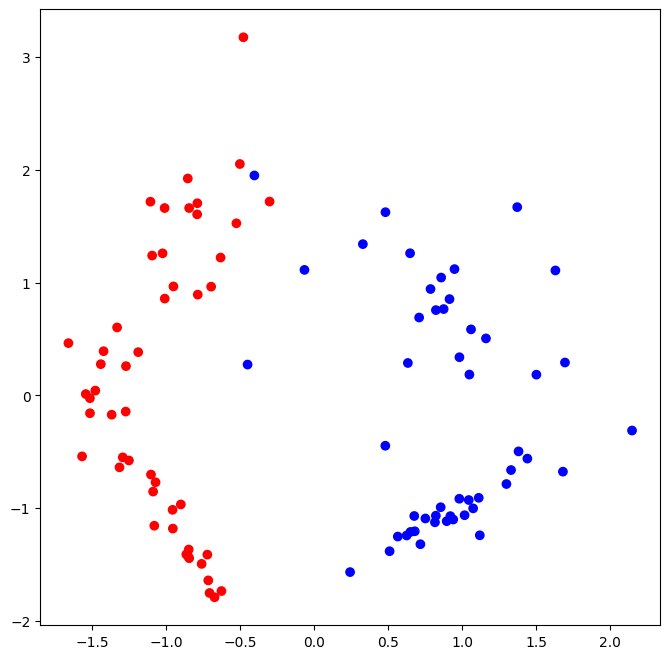

In [64]:
# Создаем случайные данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
X, y = classes[0], classes[1]
# print(X)
# print(y)

# изобразим их на графике
colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [65]:
# перемешиваем датасет
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки 70 на 30
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test = X_shuffled[:train_test_cut], X_shuffled[train_test_cut:]
y_train, y_test = y_shuffled[:train_test_cut], y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

# транспонируем матрицы данных, так как нам удобнее работать со строками
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [66]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))
n_iterations = 1000
eta = 0.05

# обучаем модель написанной логистической регрессии на сгенерированных данных
w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

# Делаем предсказание
y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w:\n{w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}%")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}%")

Итоговый вектор весов w:
[[6.28560954]
 [0.90007757]]
Точность на обучающей выборке: 98.571%
Точность на тестовой выборке: 96.667%


**Оценим качество предсказаний, сравнив их с истинными значениями Y:**  
Рассчитанные метрики показывают, что 98,57% правильно предсказанных ответов — на тренировочной выборке и 96,67% правильно предсказанных ответов — на тестовой выборке. Результаты говорят о хорошей точности предсказаний модели


Мы нашли коэффициенты прямой, которая разделит наши объекты на два класса - это итоговый вектор весов. Визуализируем эту прямую и классы

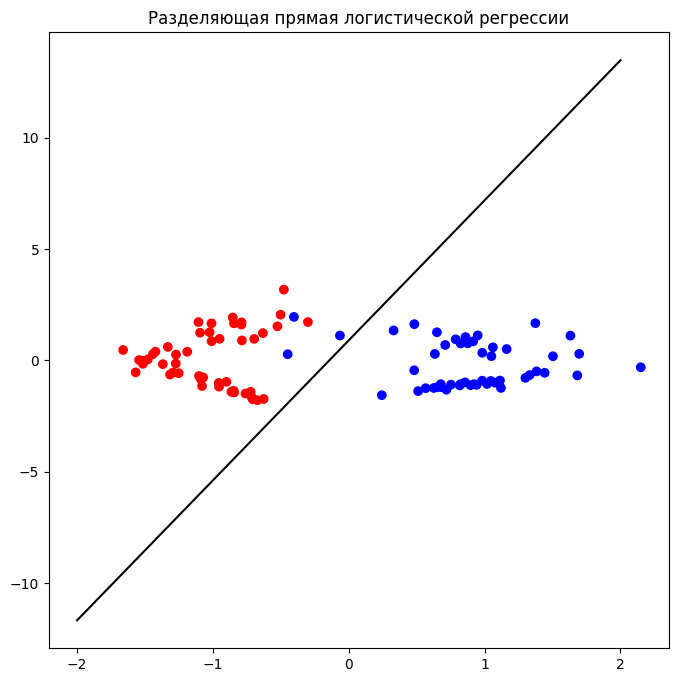

In [67]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0], color='black')
plt.title('Разделяющая прямая логистической регрессии')

plt.show()

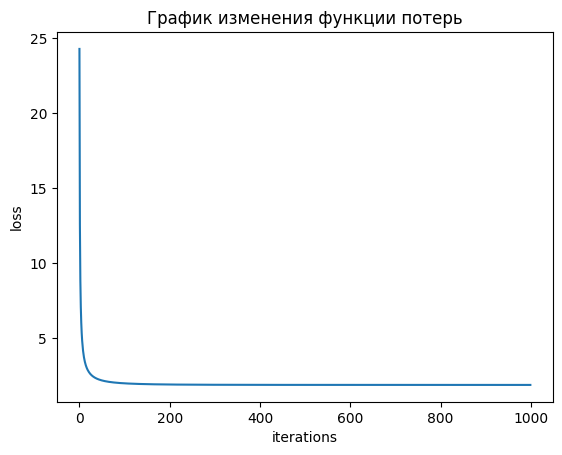

In [57]:
# Построим график изменения функции потерь
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.title('График изменения функции потерь')

plt.show()

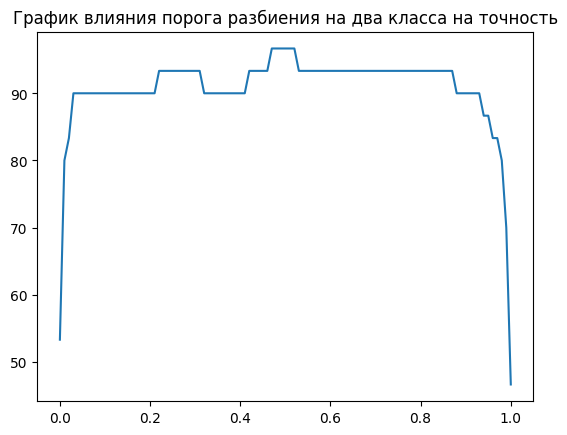

In [69]:
# подберем различные значения порога для определения точности:

test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test_tr, b/100)
  y_predicted_train = predict(w, X_train_tr, b/100)

  # В качестве меры точности возьмем долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.title('График влияния порога разбиения на два класса на точность')
plt.show()

### Дополнительные вопросы:

1. Как влияет размер шага (eta) на сходимость алгоритма?  
Ответ: Чем меньше размер шага, тем медленнее алгоритм будет сходиться. Однако если выбрать размр шага слишком большим, то есть риск "перепрыгунть" минимум. Поэтому выбор размера шага сильно влияет на результат.  

2. Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?  
Ответ: Если итераций слишком мало, то модель может недообучиться, т.е. не найти хорошие веса, а значит точность будет низкой. Если же, наоборот, итераций будет много, то модель может либо переобучиться, либо не улучшиться, но потратить время и ресурсы на обучение. Этот гиперпараметр также важно оптимально подобрать.

3. Почему логистическая регрессия подходит для задач только бинарной классификации?  
Ответ: Логистическая регрессия использует сигмоиду в качестве функции для предсказания вероятности отнесения объекта к классу. $$\sigma: \mathbb{R} → [0,1]$$
В таком случае сигмоида возвращает значение в диапазоне от 0 до 1, а значит мы может предсказать только для двух классов (0 или 1).
